# Method-1 of Preprocessing

In [208]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

preprocessed = pd.read_csv(r"C:\Users\Desktop\K\Stress-Predict-Dataset-main\Processed_data\Improved_All_Combined_hr_rsp_binary.csv")

In [209]:
preprocessed.head()

,Participant,HR,respr,Time(sec),Label
0,2,118.00,12.127693,1644227583,0
1,2,113.50,12.127693,1644227584,0
2,2,93.00,12.127693,1644227585,0
3,2,93.25,12.127693,1644227586,0
4,2,86.40,12.127693,1644227587,0


In [214]:
def Data_Reader(x):
    
    #DATA READING IN LOOP
    """ Reading data folder by folder in for loop by manual string intervention and if loop for x<10 because it shoudl
    generate values like 01,02,03... and after 9 it will generate 10,11,12..."""
    
    if x<10:
        ACC = pd.read_csv('C:\Users\Desktop\K\Stress-Predict-Dataset-main\/Raw_data/S0'+str(x)+'/ACC.csv')
        BVP = pd.read_csv('C:\Users\Desktop\K\Stress-Predict-Dataset-main\/Raw_data/S0'+str(x)+'/BVP.csv')
        EDA = pd.read_csv('C:\Users\Desktop\K\Stress-Predict-Dataset-main\/Raw_data/S0'+str(x)+'/EDA.csv')
        HR = pd.read_csv('C:/Users/pc/Desktop/Data Science A2/KEERTHAN/Stress-Predict-Dataset-main/Raw_data/S0'+str(x)+'/HR.csv')
        IBI = pd.read_csv('C:/Users/pc/Desktop/Data Science A2/KEERTHAN/Stress-Predict-Dataset-main/Raw_data/S0'+str(x)+'/IBI.csv')
        tags = pd.read_csv('C:/Users/pc/Desktop/Data Science A2/KEERTHAN/Stress-Predict-Dataset-main/Raw_data/S0'+str(x)+'/tags_S0'+str(x)+'.csv')
        TEMP = pd.read_csv('C:/Users/pc/Desktop/Data Science A2/KEERTHAN/Stress-Predict-Dataset-main/Raw_data/S0'+str(x)+'/TEMP.csv')
    else:
        ACC = pd.read_csv('C:/Users/pc/Desktop/Data Science A2/KEERTHAN/Stress-Predict-Dataset-main/Raw_data/S'+str(x)+'/ACC.csv')
        BVP = pd.read_csv('C:/Users/pc/Desktop/Data Science A2/KEERTHAN/Stress-Predict-Dataset-main/Raw_data/S'+str(x)+'/BVP.csv')
        EDA = pd.read_csv('C:/Users/pc/Desktop/Data Science A2/KEERTHAN/Stress-Predict-Dataset-main/Raw_data/S'+str(x)+'/EDA.csv')
        HR = pd.read_csv('C:/Users/pc/Desktop/Data Science A2/KEERTHAN/Stress-Predict-Dataset-main/Raw_data/S'+str(x)+'/HR.csv')
        IBI = pd.read_csv('C:/Users/pc/Desktop/Data Science A2/KEERTHAN/Stress-Predict-Dataset-main/Raw_data/S'+str(x)+'/IBI.csv')
        tags = pd.read_csv('C:/Users/pc/Desktop/Data Science A2/KEERTHAN/Stress-Predict-Dataset-main/Raw_data/S'+str(x)+'/tags_S'+str(x)+'.csv')
        TEMP = pd.read_csv('C:/Users/pc/Desktop/Data Science A2/KEERTHAN/Stress-Predict-Dataset-main/Raw_data/S'+str(x)+'/TEMP.csv')
    
    
    """We need to create a time attribute where each of the data is recorded, the column name of each dataframe attribute
    is the start time + 1 of the attribute"""
    ACC_time = int(float(ACC.columns[0])) - 1
    BVP_time = int(float(BVP.columns[0])) - 1
    EDA_time = int(float(EDA.columns[0])) - 1
    HR_time = int(float(HR.columns[0])) - 1
    IBI_time = int(float(IBI.columns[0])) - 1
    TEMP_time = int(float(TEMP.columns[0])) - 1
    
    """Dropping the first row value of all the dataframe attribute because the value is all same """
    
    ACC = ACC.drop(ACC.index[0:1]).reset_index(drop = True)
    BVP = BVP.drop(BVP.index[0:1]).reset_index(drop = True)
    EDA = EDA.drop(EDA.index[0:1]).reset_index(drop = True)
    HR = HR.drop(HR.index[0:1]).reset_index(drop = True)
    IBI = IBI.drop(IBI.index[0:1]).reset_index(drop = True)
    TEMP = TEMP.drop(TEMP.index[0:1]).reset_index(drop = True)
    
    """Creating new variable called loop which is generates the value if the lenght of the attribute"""
    
    ACC['loop'] = np.arange(ACC.shape[0])
    BVP['loop'] = np.arange(BVP.shape[0])
    EDA['loop'] = np.arange(EDA.shape[0])
    HR['loop'] = np.arange(HR.shape[0])
    IBI['loop'] = np.arange(IBI.shape[0])
    TEMP['loop'] = np.arange(TEMP.shape[0])
    
    """Fucntion to add the arange length attribute with the time for each row in seconds incremental"""
    def time(x,y):
        return x + y
    
    """applying the function"""
    ACC['Time(sec)'] = np.vectorize(time)(ACC['loop'], ACC_time)
    BVP['Time(sec)'] = np.vectorize(time)(BVP['loop'], BVP_time)
    EDA['Time(sec)'] = np.vectorize(time)(EDA['loop'], EDA_time)
    HR['Time(sec)'] = np.vectorize(time)(HR['loop'], HR_time)
    IBI['Time(sec)'] = np.vectorize(time)(IBI['loop'], IBI_time)
    TEMP['Time(sec)'] = np.vectorize(time)(TEMP['loop'], TEMP_time)
    
    """dropping loop attribute as it is not longer necessary"""
    ACC.drop('loop',axis = 1,inplace = True)
    BVP.drop('loop',axis = 1,inplace = True)
    EDA.drop('loop',axis = 1,inplace = True)
    HR.drop('loop',axis = 1,inplace = True)
    IBI.drop('loop',axis = 1,inplace = True)
    TEMP.drop('loop',axis = 1,inplace = True)
    
    #Renaming each dataframe 
    """Renaming the columns to our fitting so we can merge all the files under one name"""
    ACC.rename({ACC.columns[0]:'accelerometer_X',ACC.columns[1]:'accelerometer_Y',ACC.columns[2]:'accelerometer_Z'},axis = 1,inplace = True)
    BVP.rename({BVP.columns[0]:'BVP'},axis = 1,inplace = True)
    EDA.rename({EDA.columns[0]:'EDA'},axis = 1,inplace = True)
    HR.rename({HR.columns[0]:'heart_rate'},axis = 1,inplace=True)
    IBI.rename({IBI.columns[0]:'IBI_0',IBI.columns[1]:'IBI_1'},axis = 1,inplace = True)
    TEMP.rename({TEMP.columns[0]:'temp'},axis = 1,inplace = True)
    
    
    final_1 = ACC.merge(BVP, on = 'Time(sec)',how = 'outer').merge(EDA, on = 'Time(sec)',how = 'outer').merge(HR, on = 'Time(sec)',how = 'outer').merge(IBI, on = 'Time(sec)',how = 'outer').merge(TEMP, on = 'Time(sec)',how = 'outer')
    
    """Finally merging with preprocessed data on time(sec) to get the label attribute"""
    final_1 = final_1.merge(preprocessed[['Label','Time(sec)']],on = 'Time(sec)',how = 'inner')
    
    final_1.fillna(method='ffill', inplace=True)
    final_1.fillna(method='bfill', inplace=True)

"""There are 35 subjects data which means i have to loop through 35 folders to read the data and concat each of it after processing"""
"""Left Subject 01 for testing"""
final_df1 = pd.DataFrame()
for i in range(2,36):
    Data_Reader(i)
    final_df1 = pd.concat([final_df1,final_1],ignore_index = True)
    if i<10:
        print('Folder S0'+str(i),' is extracted/Preprocessed and merged to single csv')
    else:
        print('Folder S'+str(i),' is extracted/Preprocessed and merged to single csv')

Folder S02  is extracted/Preprocessed and merged to single csv
Folder S03  is extracted/Preprocessed and merged to single csv
Folder S04  is extracted/Preprocessed and merged to single csv
Folder S05  is extracted/Preprocessed and merged to single csv
Folder S06  is extracted/Preprocessed and merged to single csv
Folder S07  is extracted/Preprocessed and merged to single csv
Folder S08  is extracted/Preprocessed and merged to single csv
Folder S09  is extracted/Preprocessed and merged to single csv
Folder S10  is extracted/Preprocessed and merged to single csv
Folder S11  is extracted/Preprocessed and merged to single csv
Folder S12  is extracted/Preprocessed and merged to single csv
Folder S13  is extracted/Preprocessed and merged to single csv
Folder S14  is extracted/Preprocessed and merged to single csv
Folder S15  is extracted/Preprocessed and merged to single csv
Folder S16  is extracted/Preprocessed and merged to single csv
Folder S17  is extracted/Preprocessed and merged to sin

In [217]:
final_df1.shape

(353498, 11)

In [218]:
final_df1.head()

,accelerometer_X,accelerometer_Y,accelerometer_Z,Time(sec),BVP,EDA,heart_rate,IBI_0,IBI_1,temp,Label
0,-8.0,10.0,70.0,1644227583,0.00,0.664036,118.00,718.984375,0.828125,34.79,0
1,-7.0,9.0,63.0,1644227584,0.01,0.666599,113.50,719.750000,0.765625,34.79,0
2,-6.0,9.0,60.0,1644227585,0.01,0.669162,93.00,720.546875,0.796875,34.68,0
3,-5.0,3.0,56.0,1644227586,-0.00,0.678132,93.25,721.390625,0.843750,34.68,0
4,-5.0,0.0,54.0,1644227587,-0.03,0.683258,86.40,722.203125,0.812500,34.68,0


In [219]:
final_df1.to_csv('Merged.csv')

# Basic EDA

In [220]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [221]:
final_df1 = pd.read_csv('Merged.csv')

In [222]:
"""Checking null value of each individual columns"""
final_df1.isnull().sum()

Unnamed: 0         0
accelerometer_X    0
accelerometer_Y    0
accelerometer_Z    0
Time(sec)          0
BVP                0
EDA                0
heart_rate         0
IBI_0              0
IBI_1              0
temp               0
Label              0
dtype: int64

In [223]:
"""Checking Duplicated value of entire dataframe"""
final_df1.duplicated().sum()

0

In [224]:
"""Checking value count of 0's and 1's """

"""From this description we get to know that the data is imbalanced with more number of 0's and less number of 1's
But this can be solved by downsampling and upsampling"""
final_df1['Label'].value_counts()

0    244630
1    108868
Name: Label, dtype: int64

<AxesSubplot:xlabel='Label', ylabel='count'>

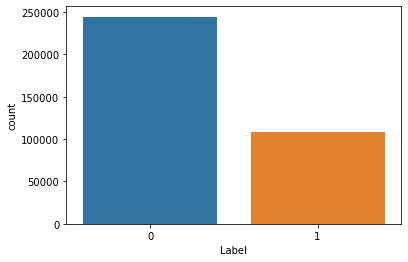

In [225]:
sns.countplot(final_df1['Label'])

In [226]:
#Dropping columns which are not required for dependent variable to classify
final_df1.drop({"Unnamed: 0"},axis = 1,inplace = True)

In [228]:
import datetime

final_df1['datetime'] = pd.to_datetime(final_df1['Time(sec)'], unit='s')

In [229]:
final_df1.head()

,accelerometer_X,accelerometer_Y,accelerometer_Z,Time(sec),BVP,EDA,heart_rate,IBI_0,IBI_1,temp,Label,datetime
0,-8.0,10.0,70.0,1644227583,0.00,0.664036,118.00,718.984375,0.828125,34.79,0,2022-02-07 09:53:03
1,-7.0,9.0,63.0,1644227584,0.01,0.666599,113.50,719.750000,0.765625,34.79,0,2022-02-07 09:53:04
2,-6.0,9.0,60.0,1644227585,0.01,0.669162,93.00,720.546875,0.796875,34.68,0,2022-02-07 09:53:05
3,-5.0,3.0,56.0,1644227586,-0.00,0.678132,93.25,721.390625,0.843750,34.68,0,2022-02-07 09:53:06
4,-5.0,0.0,54.0,1644227587,-0.03,0.683258,86.40,722.203125,0.812500,34.68,0,2022-02-07 09:53:07


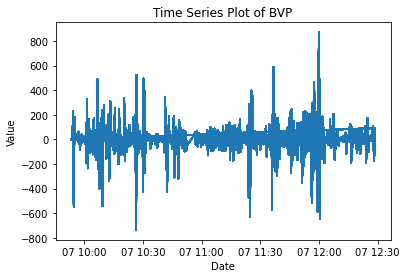

In [241]:
fig, ax = plt.subplots()

# Plot the data as a time series
ax.plot(final_df1.datetime, final_df1['BVP'])

# Set the axis labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Time Series Plot of BVP')

# Display the plot
plt.show()

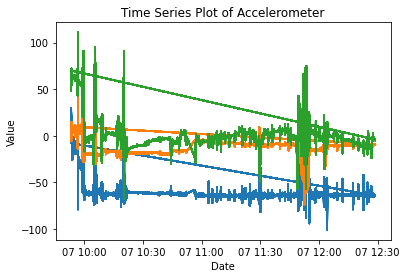

In [232]:
fig, ax = plt.subplots()

# Plot the data as a time series
ax.plot(final_df1.datetime, final_df1['accelerometer_X'])
ax.plot(final_df1.datetime, final_df1['accelerometer_Y'])
ax.plot(final_df1.datetime, final_df1['accelerometer_Z'])

# Set the axis labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Time Series Plot of Accelerometer')

# Display the plot
plt.show()

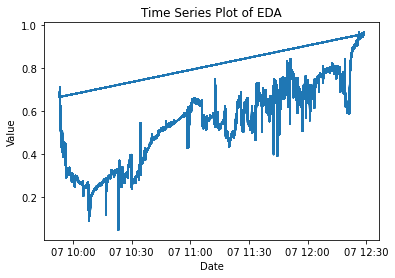

In [240]:
fig, ax = plt.subplots()

# Plot the data as a time series
ax.plot(final_df1.datetime, final_df1['EDA'])

# Set the axis labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Time Series Plot of EDA')

# Display the plot
plt.show()

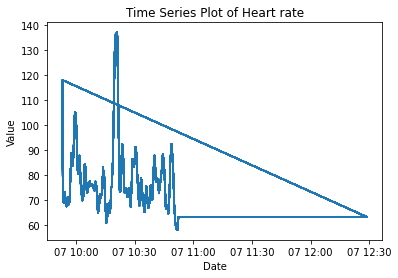

In [238]:
fig, ax = plt.subplots()

# Plot the data as a time series
ax.plot(final_df1.datetime, final_df1['heart_rate'])

# Set the axis labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Time Series Plot of Heart rate')

# Display the plot
plt.show()

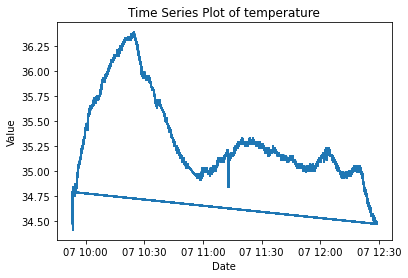

In [239]:
fig, ax = plt.subplots()

# Plot the data as a time series
ax.plot(final_df1.datetime, final_df1['temp'])

# Set the axis labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Time Series Plot of temperature')

# Display the plot
plt.show()

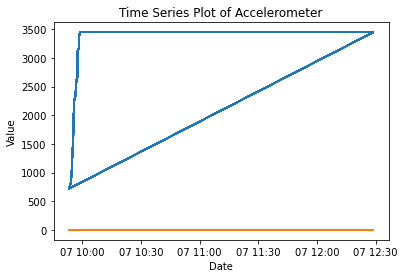

In [242]:
fig, ax = plt.subplots()

# Plot the data as a time series
ax.plot(final_df1.datetime, final_df1['IBI_0'])
ax.plot(final_df1.datetime, final_df1['IBI_1'])

# Set the axis labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Time Series Plot of Accelerometer')

# Display the plot
plt.show()

# Downsampling

In [250]:
"""Separate Zeros and Ones then downsampling the 0's and concat them together to balance the data"""
zero_final_df1 = final_df1[final_df1['Label'] == 0]
one_final_df1 = final_df1[final_df1['Label'] == 1]

"""Randomly selecting 37000 0's data"""
zero_final_df1 = zero_final_df1.sample(108868)

In [251]:
zero_final_df1.shape,one_final_df1.shape

((108868, 12), (108868, 12))

In [252]:
"""Concat zeros and ones after downsampling"""
down_final_df1 = pd.concat([zero_final_df1,one_final_df1],ignore_index = True)

In [253]:
down_final_df1.shape

(217736, 12)

In [254]:
down_final_df1.head()

,accelerometer_X,accelerometer_Y,accelerometer_Z,Time(sec),BVP,EDA,heart_rate,IBI_0,IBI_1,temp,Label,datetime
0,-66.0,-41.0,-19.0,1644234662,-168.23,0.662755,63.38,3448.484375,0.953125,35.03,0,2022-02-07 11:51:02
1,-64.0,-10.0,3.0,1644233588,-128.18,0.598685,63.38,3448.484375,0.953125,35.18,0,2022-02-07 11:33:08
2,-58.0,-13.0,30.0,1644234596,77.28,0.780645,63.38,3448.484375,0.953125,35.05,0,2022-02-07 11:49:56
3,-62.0,-12.0,-4.0,1644234338,-204.58,0.630720,63.38,3448.484375,0.953125,35.11,0,2022-02-07 11:45:38
4,-63.0,-11.0,-2.0,1644235806,-51.24,0.792177,63.38,3448.484375,0.953125,35.00,0,2022-02-07 12:10:06


In [255]:
down_final_df1['Label'].value_counts()

0    108868
1    108868
Name: Label, dtype: int64

<AxesSubplot:xlabel='Label', ylabel='count'>

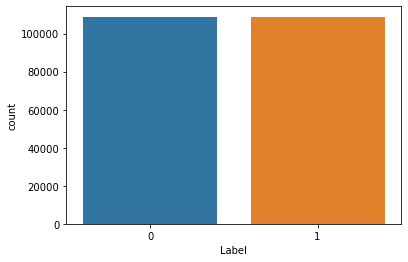

In [256]:
sns.countplot(down_final_df1['Label'])

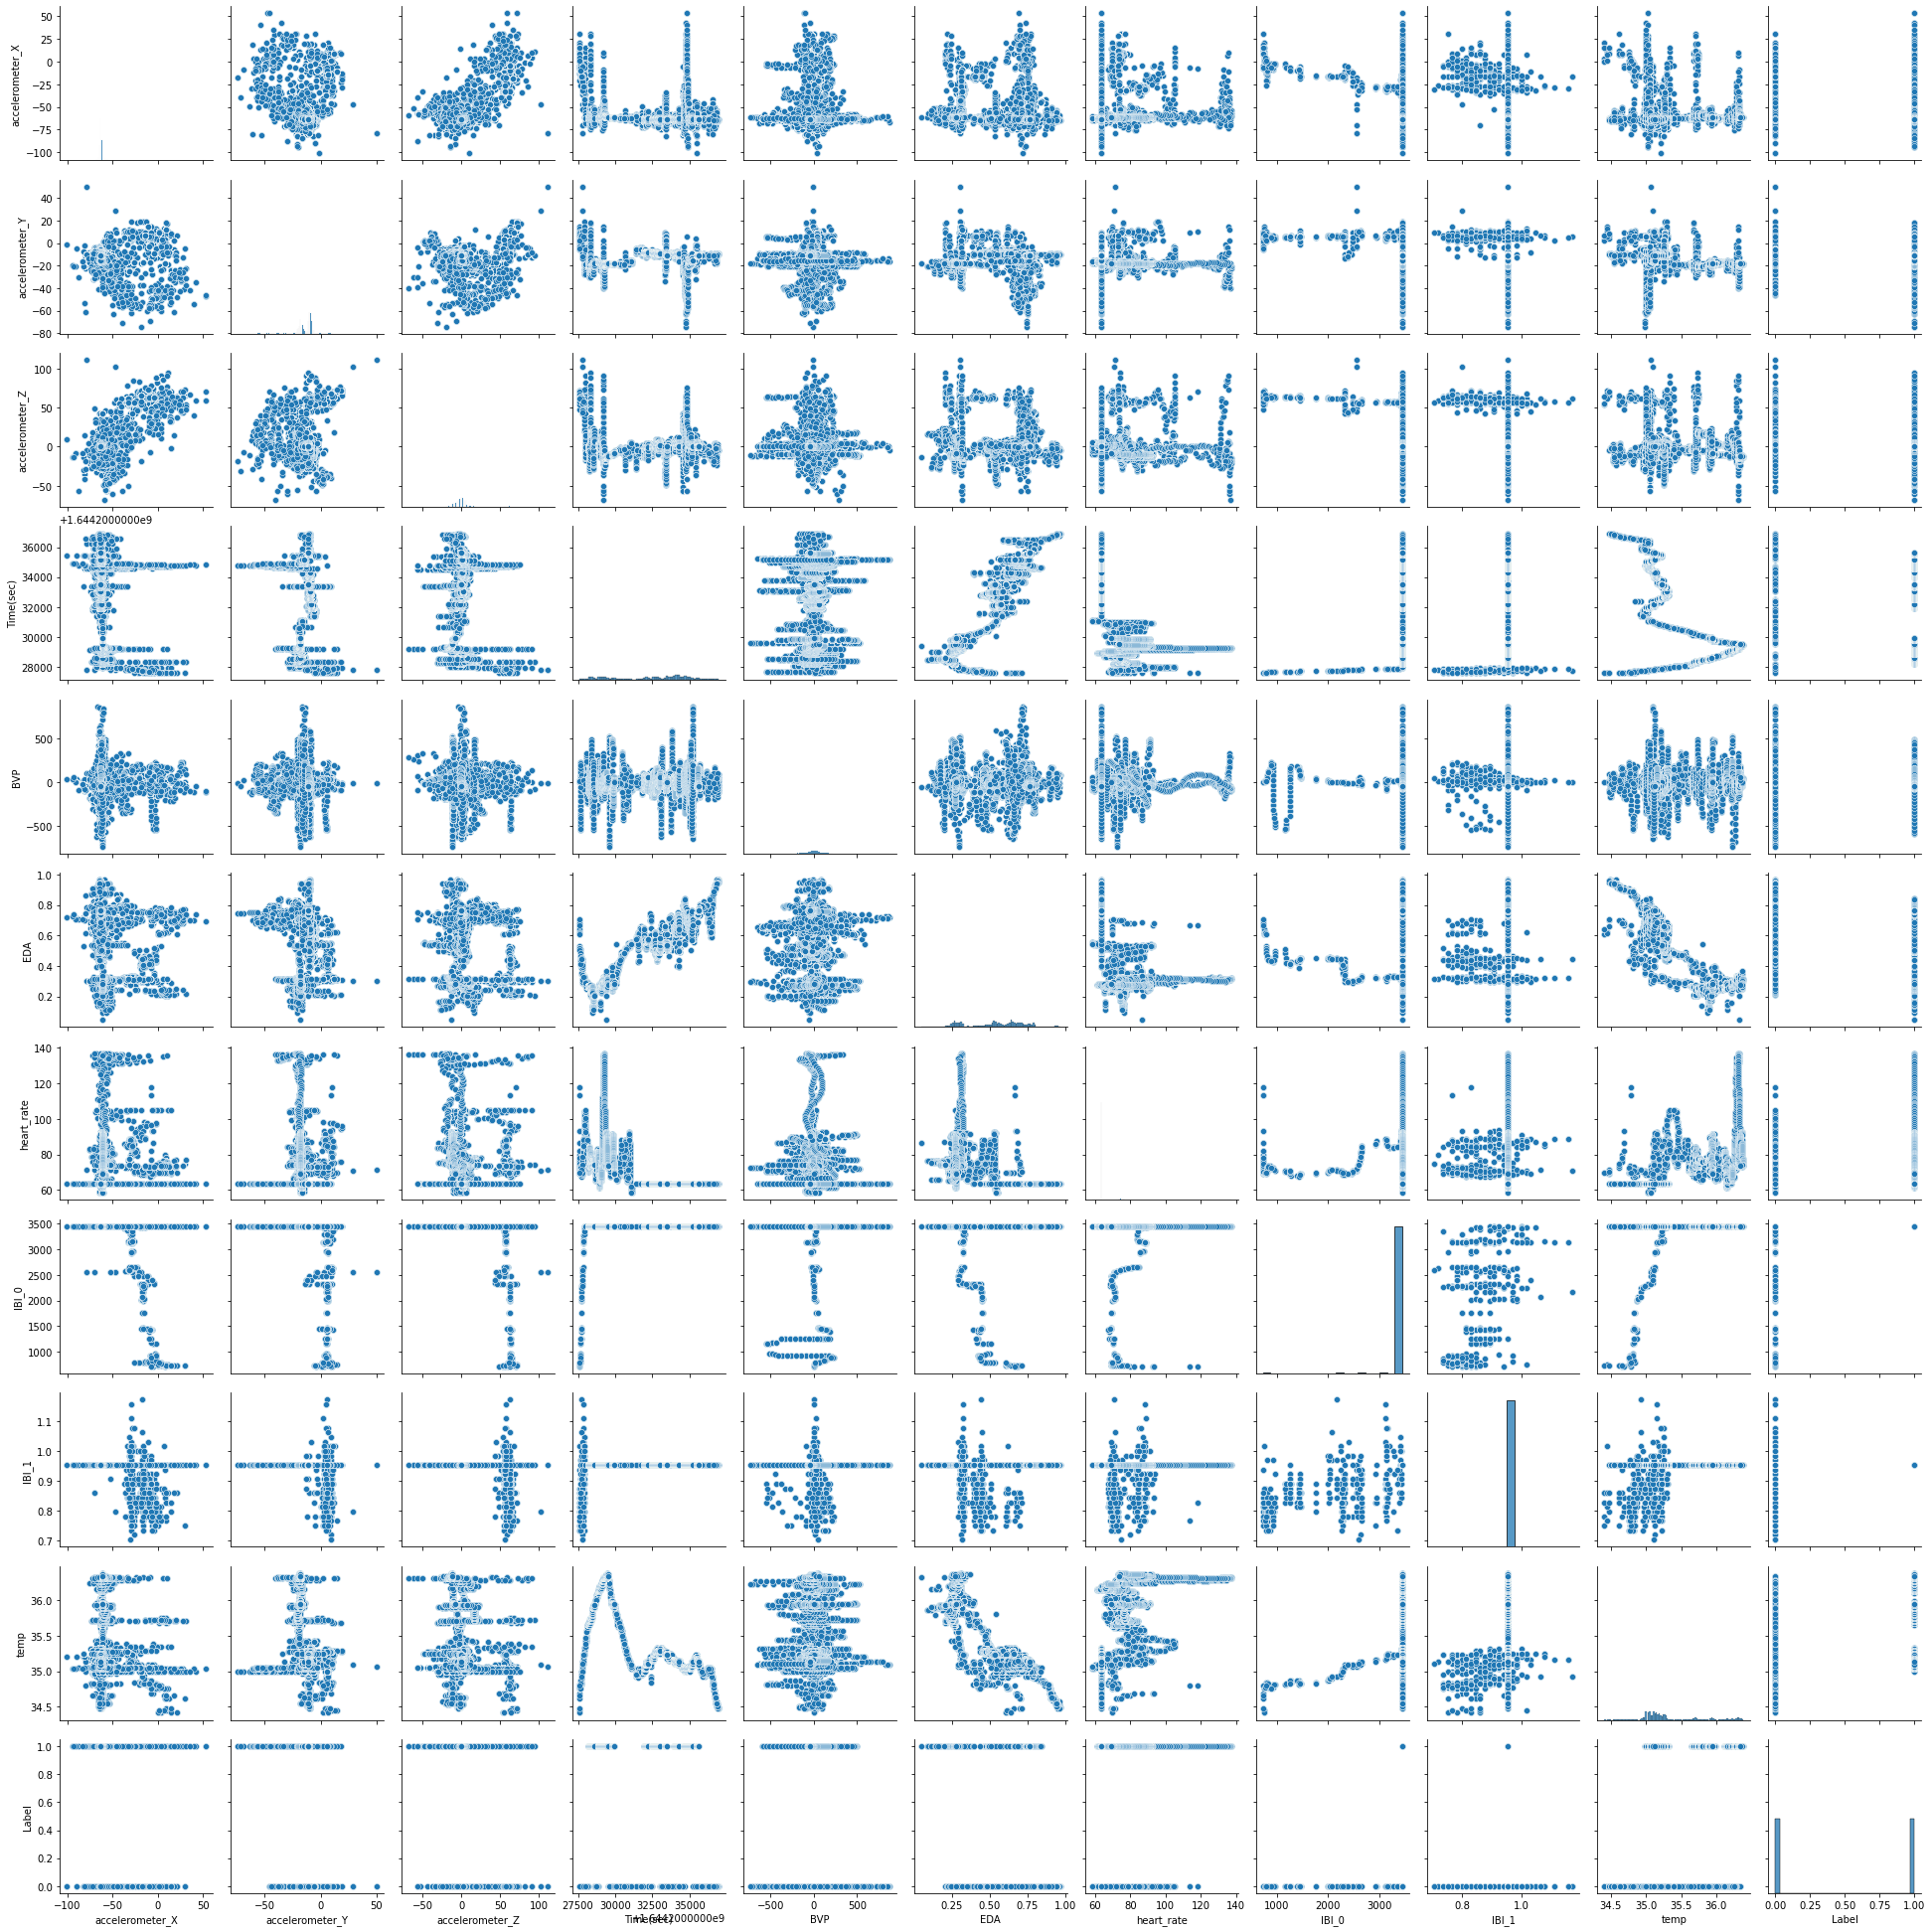

In [257]:
sns.pairplot(down_final_df1)
plt.show()

# Skewed Data

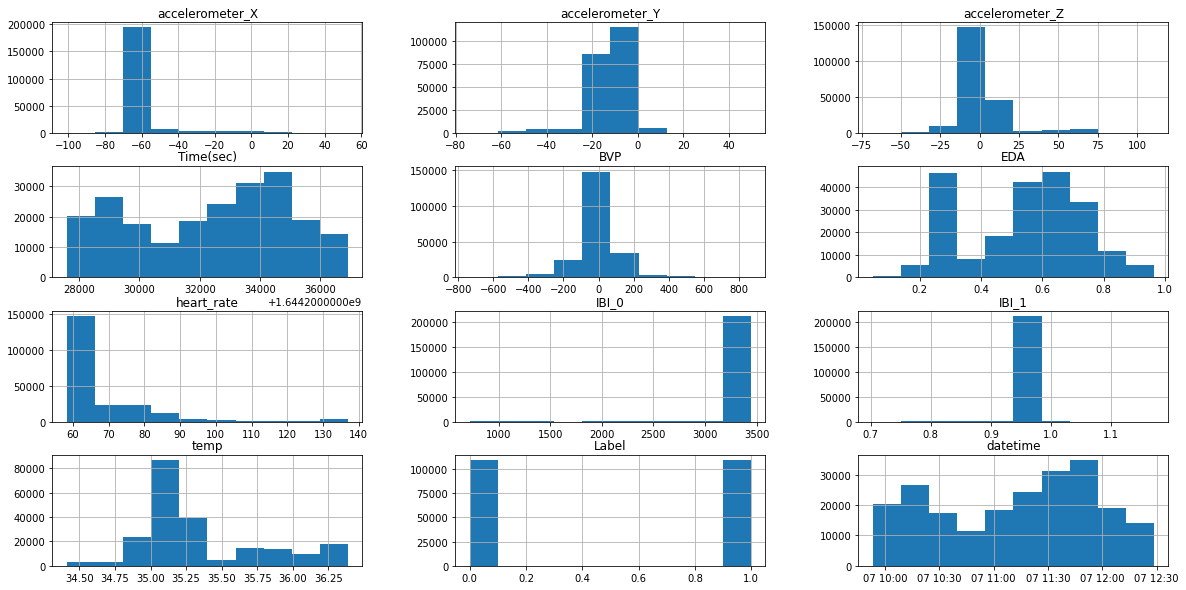

In [258]:
"""Histogram plot helps us figure out which data attribute is skewed left or right.
Here for ex EDA is right skewed data and temp is left skewed data"""
down_final_df1.hist(figsize = (20,10))
plt.show()

# Outlier

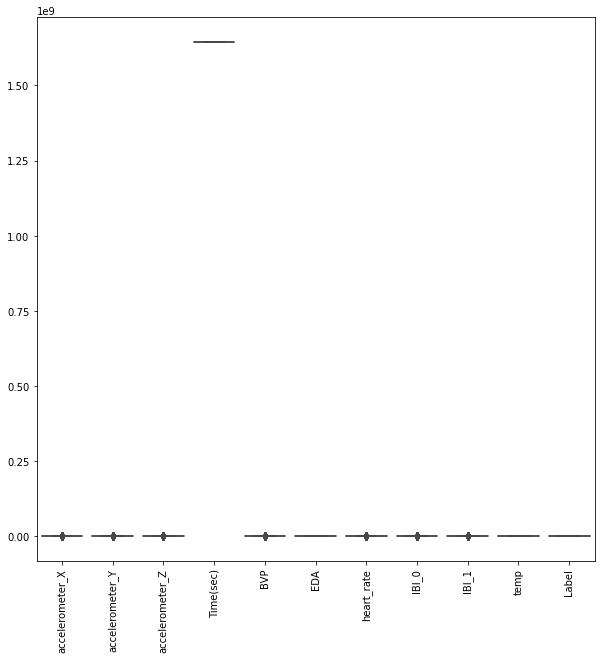

In [259]:
"""Box plot helps us find the outlier which will be handled while modeling by z-score"""
plt.figure(figsize=(10,10))
sns.boxplot(data=down_final_df1)
plt.xticks(rotation=90)
plt.show()

# Identifying highly posively correlated and highly negatively correlated attributes

In [260]:
down_final_df1.corr()

,accelerometer_X,accelerometer_Y,accelerometer_Z,Time(sec),BVP,EDA,heart_rate,IBI_0,IBI_1,temp,Label
accelerometer_X,1.000000,-0.230143,0.718830,-0.165945,-0.010517,-0.065402,0.127012,-0.450037,-0.375246,-0.048543,0.095060
accelerometer_Y,-0.230143,1.000000,0.088665,0.065241,0.023886,0.117508,-0.207365,-0.283960,-0.261551,-0.291296,-0.248530
accelerometer_Z,0.718830,0.088665,1.000000,-0.171880,-0.019166,-0.068960,0.002494,-0.490126,-0.436379,-0.128247,0.065054
Time(sec),-0.165945,0.065241,-0.171880,1.000000,-0.008737,0.922683,-0.585966,0.234113,0.208520,-0.743064,-0.133553
BVP,-0.010517,0.023886,-0.019166,-0.008737,1.000000,-0.001675,0.014265,0.001630,-0.002893,0.007240,-0.015170
EDA,-0.065402,0.117508,-0.068960,0.922683,-0.001675,1.000000,-0.561000,0.052117,0.063158,-0.844863,-0.258447
heart_rate,0.127012,-0.207365,0.002494,-0.585966,0.014265,-0.561000,1.000000,-0.038223,-0.051137,0.626330,0.125196
IBI_0,-0.450037,-0.283960,-0.490126,0.234113,0.001630,0.052117,-0.038223,1.000000,0.779418,0.150296,0.129666
IBI_1,-0.375246,-0.261551,-0.436379,0.208520,-0.002893,0.063158,-0.051137,0.779418,1.000000,0.119186,0.116190
temp,-0.048543,-0.291296,-0.128247,-0.743064,0.007240,-0.844863,0.626330,0.150296,0.119186,1.000000,0.291955


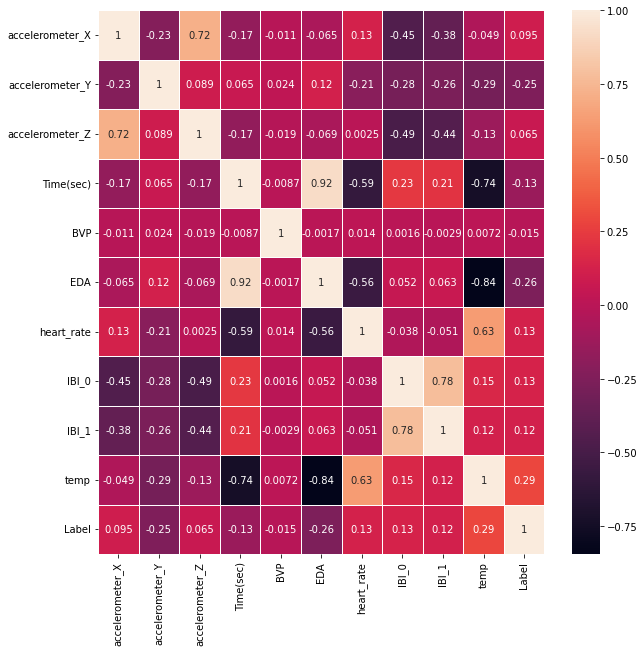

In [261]:
"""Heat map is a visual representation of correlation table"""
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(down_final_df1.corr(), linewidth=0.8,annot = True)
plt.show()

# Upsamling

In [265]:
"""Separate Zeros and Ones then upsampling the 1's and concat them together to balance the data"""
z_final_df1 = final_df1[final_df1['Label'] == 0]
o_final_df1 = final_df1[final_df1['Label'] == 1]

In [266]:
"""Split data for fitting into smote"""
X = final_df1.drop({'Label','datetime'},axis = 1) #"""select all rows and first 8 columns which are the attributes"""
Y = final_df1['Label']   #"""select all rows and the 8th column which is the classification "Yes", "No" for diabeties"""
test_size = 0.30 #"""taking 70:30 training and test set"""
seed = 7  #"""Random numbmer seeding for reapeatability of the code"""
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [267]:
print("Before Upsampling 1's:- ",o_final_df1.shape[0])

"""Synthetic Minority Over Sampling Technique AKA SMOTE"""
sm = SMOTE()   
dependent, label = sm.fit_resample(X_train, y_train.ravel())
print("After UpSampling 1's:- {}".format(sum(label==1)))

Before Upsampling 1's:-  108868
After UpSampling 1's:- 171053


In [268]:
up_final_df1 = dependent.copy()
up_final_df1['Label'] = label

In [269]:
up_final_df1.head()

,accelerometer_X,accelerometer_Y,accelerometer_Z,Time(sec),BVP,EDA,heart_rate,IBI_0,IBI_1,temp,Label
0,-64.0,-16.0,-10.0,1644228010,-4.64,0.289865,99.10,3448.484375,0.953125,35.43,0
1,-61.0,-18.0,-12.0,1644229478,39.79,0.309086,74.07,3448.484375,0.953125,36.39,1
2,-65.0,-11.0,4.0,1644234061,15.00,0.665318,63.38,3448.484375,0.953125,35.15,1
3,-63.0,-8.0,-4.0,1644232469,-162.66,0.533333,63.38,3448.484375,0.953125,35.15,0
4,-62.0,-17.0,3.0,1644228746,0.96,0.247579,70.90,3448.484375,0.953125,36.05,0


In [270]:
up_final_df1['Label'].value_counts()

0    171053
1    171053
Name: Label, dtype: int64

<AxesSubplot:xlabel='Label', ylabel='count'>

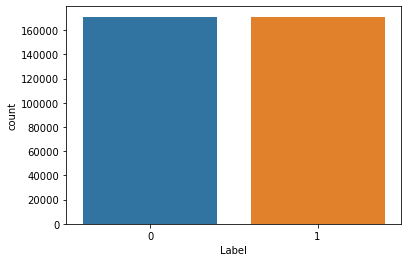

In [271]:
sns.countplot(up_final_df1['Label'])

# skewed data

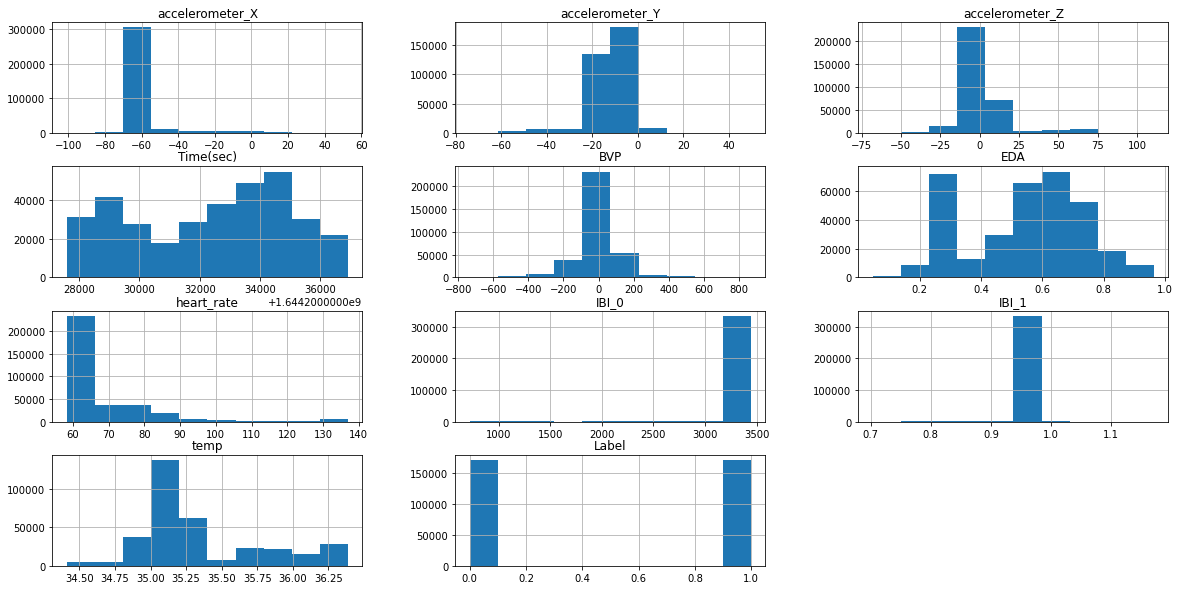

In [272]:
"""Histogram plot helps us figure out which data attribute is skewed left or right.
Here for ex EDA is right skewed data and temp is left skewed data"""
up_final_df1.hist(figsize = (20,10))
plt.show()

# Outlier

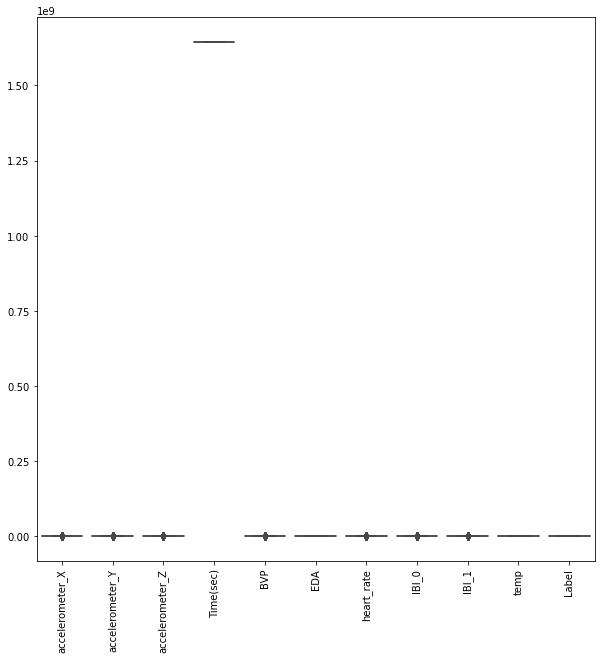

In [273]:
"""Box plot helps us find the outlier which will be handled while modeling by z-score"""
plt.figure(figsize=(10,10))
sns.boxplot(data=up_final_df1)
plt.xticks(rotation=90)
plt.show()

# Identifying highly posively correlated and highly negatively correlated attributes

In [274]:
up_final_df1.corr()

,accelerometer_X,accelerometer_Y,accelerometer_Z,Time(sec),BVP,EDA,heart_rate,IBI_0,IBI_1,temp,Label
accelerometer_X,1.000000,-0.237705,0.718132,-0.163979,-0.010869,-0.062503,0.126490,-0.450021,-0.374489,-0.050498,0.095918
accelerometer_Y,-0.237705,1.000000,0.086861,0.062154,0.027718,0.114767,-0.205480,-0.284389,-0.260041,-0.288733,-0.250627
accelerometer_Z,0.718132,0.086861,1.000000,-0.170824,-0.017671,-0.067178,0.002986,-0.491076,-0.435116,-0.129764,0.064759
Time(sec),-0.163979,0.062154,-0.170824,1.000000,-0.012681,0.922259,-0.585735,0.235666,0.208844,-0.742289,-0.131282
BVP,-0.010869,0.027718,-0.017671,-0.012681,1.000000,-0.005912,0.015794,-0.003727,-0.006510,0.008984,-0.014704
EDA,-0.062503,0.114767,-0.067178,0.922259,-0.005912,1.000000,-0.560598,0.052297,0.062368,-0.844653,-0.257672
heart_rate,0.126490,-0.205480,0.002986,-0.585735,0.015794,-0.560598,1.000000,-0.038661,-0.050754,0.626295,0.124759
IBI_0,-0.450021,-0.284389,-0.491076,0.235666,-0.003727,0.052297,-0.038661,1.000000,0.780970,0.150969,0.130264
IBI_1,-0.374489,-0.260041,-0.435116,0.208844,-0.006510,0.062368,-0.050754,0.780970,1.000000,0.119672,0.116102
temp,-0.050498,-0.288733,-0.129764,-0.742289,0.008984,-0.844653,0.626295,0.150969,0.119672,1.000000,0.291121


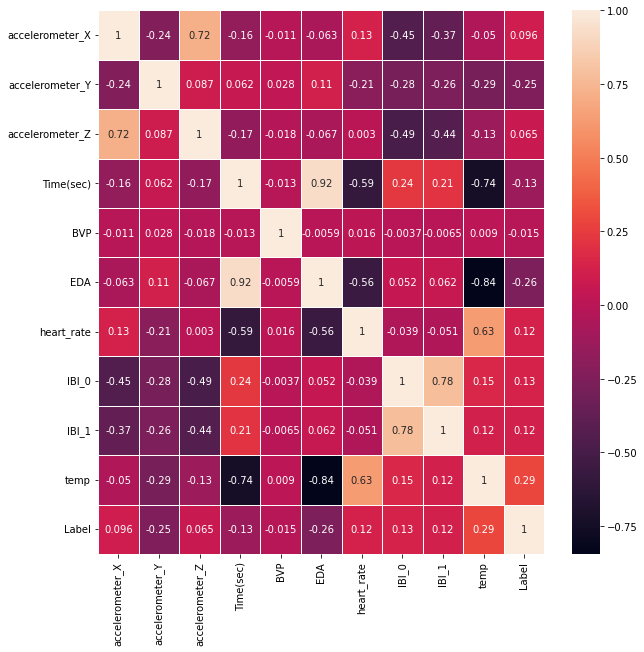

In [275]:
"""Heat map is a visual representation of correlation table"""
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(up_final_df1.corr(), linewidth=0.8,annot = True)
plt.show()

# Splitting the Data into Training and testing set

In [276]:
from sklearn.model_selection import train_test_split

In [283]:
X = down_final_df1.drop({'Label','datetime','Time(sec)'},axis = 1)
y = down_final_df1['Label']

In [284]:
#Splitting training and testing into 805 and 20% ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [285]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((174188, 9), (43548, 9), (174188,), (43548,))

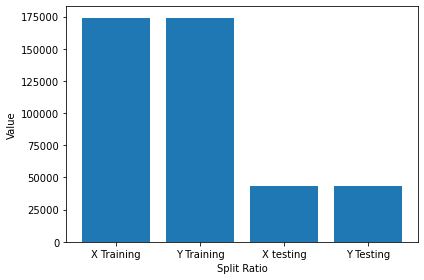

In [286]:
data = [X_train.shape[0],y_train.shape[0],X_test.shape[0],y_test.shape[0]]
labels = ['X Training', 'Y Training', 'X testing', 'Y Testing']

# Set up the plot
fig, ax = plt.subplots()

# Plot the bars
ax.bar(labels, data)

# Add labels and adjust the layout
ax.set_xlabel('Split Ratio')
ax.set_ylabel('Value')
plt.tight_layout()

# Show the plot
plt.show()

# Model Building

# LR (Logistic Regression)

In [287]:
from sklearn.linear_model import LogisticRegression

In [288]:
LR = LogisticRegression(random_state=42).fit(X_train, y_train)
LR_predict = LR.predict(X_test)

In [289]:
from sklearn.metrics import classification_report

In [290]:
print(classification_report(y_test,LR_predict))

              precision    recall  f1-score   support

           0       0.58      0.68      0.63     21709
           1       0.62      0.51      0.56     21839

    accuracy                           0.60     43548
   macro avg       0.60      0.60      0.59     43548
weighted avg       0.60      0.60      0.59     43548



# Random Forest (RF)

In [291]:
from sklearn.ensemble import RandomForestClassifier

In [292]:
RF = RandomForestClassifier().fit(X_train, y_train)
RF_predict = RF.predict(X_test)

In [293]:
print(classification_report(y_test,RF_predict))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     21709
           1       0.93      1.00      0.97     21839

    accuracy                           0.96     43548
   macro avg       0.97      0.96      0.96     43548
weighted avg       0.97      0.96      0.96     43548



# Naive Bayes (NB)

In [294]:
from sklearn.naive_bayes import GaussianNB

In [295]:
GNB = GaussianNB().fit(X_train, y_train)
GNB_predict = GNB.predict(X_test)

In [296]:
print(classification_report(y_test,GNB_predict))

              precision    recall  f1-score   support

           0       1.00      0.05      0.09     21709
           1       0.51      1.00      0.68     21839

    accuracy                           0.53     43548
   macro avg       0.76      0.52      0.38     43548
weighted avg       0.76      0.53      0.39     43548



# ADABOOST Classifier

In [297]:
from sklearn.ensemble import AdaBoostClassifier

In [299]:
ADA = AdaBoostClassifier().fit(X_train, y_train)
ADA_predict = ADA.predict(X_test)

In [300]:
print(classification_report(y_test,ADA_predict))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84     21709
           1       0.85      0.82      0.84     21839

    accuracy                           0.84     43548
   macro avg       0.84      0.84      0.84     43548
weighted avg       0.84      0.84      0.84     43548



# GradientBoosting Classifier

In [301]:
from sklearn.ensemble import GradientBoostingClassifier

In [302]:
GBC = GradientBoostingClassifier().fit(X_train, y_train)
GBC_predict = GBC.predict(X_test)

In [303]:
print(classification_report(y_test,GBC_predict))

              precision    recall  f1-score   support

           0       0.92      0.87      0.90     21709
           1       0.88      0.93      0.90     21839

    accuracy                           0.90     43548
   macro avg       0.90      0.90      0.90     43548
weighted avg       0.90      0.90      0.90     43548



# Model Comparision

RANDOM FOREST: 0.9642463488564342
LOGISTIC REGRESSION: 0.5953430697161752
ADA BOOST: 0.8394415357766143
GRADIENT BOOSTING: 0.8994213281895839
NAIVE BAYES:: 0.5252365206209241


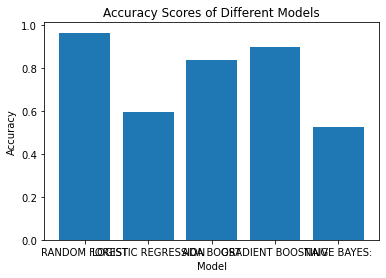

In [306]:
from sklearn.metrics import accuracy_score

# Create a dictionary to store the models
models = {'RANDOM FOREST': RandomForestClassifier(),
          'LOGISTIC REGRESSION': LogisticRegression(random_state=42),
         'ADA BOOST':AdaBoostClassifier(),
         "GRADIENT BOOSTING":GradientBoostingClassifier(),
         "NAIVE BAYES:":GaussianNB()}

# Train and evaluate each model
accuracies = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'{name}: {accuracy}')

# Plot the accuracy scores
plt.bar(np.arange(len(models)), accuracies)
plt.xticks(np.arange(len(models)), models.keys())
plt.title('Accuracy Scores of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

# Predicting for Unseen Data which is Subject 1 S01.

In [ ]:
#I have merged subject 2 - subject 35 which is s02-s35 and left s01 so i can train the models and predict on this subject as test

In [323]:
x = 1

if x<10:
    ACC = pd.read_csv('C:/Users/pc/Desktop/Data Science A2/KEERTHAN/Stress-Predict-Dataset-main/Raw_data/S0'+str(x)+'/ACC.csv')
    BVP = pd.read_csv('C:/Users/pc/Desktop/Data Science A2/KEERTHAN/Stress-Predict-Dataset-main/Raw_data/S0'+str(x)+'/BVP.csv')
    EDA = pd.read_csv('C:/Users/pc/Desktop/Data Science A2/KEERTHAN/Stress-Predict-Dataset-main/Raw_data/S0'+str(x)+'/EDA.csv')
    HR = pd.read_csv('C:/Users/pc/Desktop/Data Science A2/KEERTHAN/Stress-Predict-Dataset-main/Raw_data/S0'+str(x)+'/HR.csv')
    IBI = pd.read_csv('C:/Users/pc/Desktop/Data Science A2/KEERTHAN/Stress-Predict-Dataset-main/Raw_data/S0'+str(x)+'/IBI.csv')
    tags = pd.read_csv('C:/Users/pc/Desktop/Data Science A2/KEERTHAN/Stress-Predict-Dataset-main/Raw_data/S0'+str(x)+'/tags_S0'+str(x)+'.csv')
    TEMP = pd.read_csv('C:/Users/pc/Desktop/Data Science A2/KEERTHAN/Stress-Predict-Dataset-main/Raw_data/S0'+str(x)+'/TEMP.csv')
else:
    ACC = pd.read_csv('C:/Users/pc/Desktop/Data Science A2/KEERTHAN/Stress-Predict-Dataset-main/Raw_data/S'+str(x)+'/ACC.csv')
    BVP = pd.read_csv('C:/Users/pc/Desktop/Data Science A2/KEERTHAN/Stress-Predict-Dataset-main/Raw_data/S'+str(x)+'/BVP.csv')
    EDA = pd.read_csv('C:/Users/pc/Desktop/Data Science A2/KEERTHAN/Stress-Predict-Dataset-main/Raw_data/S'+str(x)+'/EDA.csv')
    HR = pd.read_csv('C:/Users/pc/Desktop/Data Science A2/KEERTHAN/Stress-Predict-Dataset-main/Raw_data/S'+str(x)+'/HR.csv')
    IBI = pd.read_csv('C:/Users/pc/Desktop/Data Science A2/KEERTHAN/Stress-Predict-Dataset-main/Raw_data/S'+str(x)+'/IBI.csv')
    tags = pd.read_csv('C:/Users/pc/Desktop/Data Science A2/KEERTHAN/Stress-Predict-Dataset-main/Raw_data/S'+str(x)+'/tags_S'+str(x)+'.csv')
    TEMP = pd.read_csv('C:/Users/pc/Desktop/Data Science A2/KEERTHAN/Stress-Predict-Dataset-main/Raw_data/S'+str(x)+'/TEMP.csv')
    
    
"""We need to create a time attribute where each of the data is recorded, the column name of each dataframe attribute
is the start time + 1 of the attribute"""
ACC_time = int(float(ACC.columns[0])) - 1
BVP_time = int(float(BVP.columns[0])) - 1
EDA_time = int(float(EDA.columns[0])) - 1
HR_time = int(float(HR.columns[0])) - 1
IBI_time = int(float(IBI.columns[0])) - 1
TEMP_time = int(float(TEMP.columns[0])) - 1

"""Dropping the first row value of all the dataframe attribute because the value is all same """

ACC = ACC.drop(ACC.index[0:1]).reset_index(drop = True)
BVP = BVP.drop(BVP.index[0:1]).reset_index(drop = True)
EDA = EDA.drop(EDA.index[0:1]).reset_index(drop = True)
HR = HR.drop(HR.index[0:1]).reset_index(drop = True)
IBI = IBI.drop(IBI.index[0:1]).reset_index(drop = True)
TEMP = TEMP.drop(TEMP.index[0:1]).reset_index(drop = True)

"""Creating new variable called loop which is generates the value if the lenght of the attribute"""

ACC['loop'] = np.arange(ACC.shape[0])
BVP['loop'] = np.arange(BVP.shape[0])
EDA['loop'] = np.arange(EDA.shape[0])
HR['loop'] = np.arange(HR.shape[0])
IBI['loop'] = np.arange(IBI.shape[0])
TEMP['loop'] = np.arange(TEMP.shape[0])

"""Fucntion to add the arange length attribute with the time for each row in seconds incremental"""
def time(x,y):
    return x + y

"""applying the function"""
ACC['Time(sec)'] = np.vectorize(time)(ACC['loop'], ACC_time)
BVP['Time(sec)'] = np.vectorize(time)(BVP['loop'], BVP_time)
EDA['Time(sec)'] = np.vectorize(time)(EDA['loop'], EDA_time)
HR['Time(sec)'] = np.vectorize(time)(HR['loop'], HR_time)
IBI['Time(sec)'] = np.vectorize(time)(IBI['loop'], IBI_time)
TEMP['Time(sec)'] = np.vectorize(time)(TEMP['loop'], TEMP_time)

"""dropping loop attribute as it is not longer necessary"""
ACC.drop('loop',axis = 1,inplace = True)
BVP.drop('loop',axis = 1,inplace = True)
EDA.drop('loop',axis = 1,inplace = True)
HR.drop('loop',axis = 1,inplace = True)
IBI.drop('loop',axis = 1,inplace = True)
TEMP.drop('loop',axis = 1,inplace = True)

#Renaming each dataframe 
"""Renaming the columns to our fitting so we can merge all the files under one name"""
ACC.rename({ACC.columns[0]:'accelerometer_X',ACC.columns[1]:'accelerometer_Y',ACC.columns[2]:'accelerometer_Z'},axis = 1,inplace = True)
BVP.rename({BVP.columns[0]:'BVP'},axis = 1,inplace = True)
EDA.rename({EDA.columns[0]:'EDA'},axis = 1,inplace = True)
HR.rename({HR.columns[0]:'heart_rate'},axis = 1,inplace=True)
IBI.rename({IBI.columns[0]:'IBI_0',IBI.columns[1]:'IBI_1'},axis = 1,inplace = True)
TEMP.rename({TEMP.columns[0]:'temp'},axis = 1,inplace = True)


subject01 = ACC.merge(BVP, on = 'Time(sec)',how = 'outer').merge(EDA, on = 'Time(sec)',how = 'outer').merge(HR, on = 'Time(sec)',how = 'outer').merge(IBI, on = 'Time(sec)',how = 'outer').merge(TEMP, on = 'Time(sec)',how = 'outer')

subject01.fillna(method='ffill', inplace=True)
subject01.fillna(method='bfill', inplace=True)

In [324]:
subject01

,accelerometer_X,accelerometer_Y,accelerometer_Z,Time(sec),BVP,EDA,heart_rate,IBI_0,IBI_1,temp
0,-2.0,43.0,43.0,1644226060,0.00,0.000000,83.00,36.343750,0.859375,28.39
1,-2.0,44.0,46.0,1644226061,0.00,0.112750,83.00,37.296875,0.953125,28.39
2,2.0,44.0,47.0,1644226062,0.00,0.166563,83.00,38.187500,0.890625,28.39
3,3.0,43.0,44.0,1644226063,0.00,0.167844,83.00,39.046875,0.859375,28.39
4,1.0,43.0,45.0,1644226064,0.00,0.167844,83.00,39.859375,0.812500,28.39
...,...,...,...,...,...,...,...,...,...,...
208698,34.0,3.0,49.0,1644434758,-56.27,0.021781,83.23,2856.468750,1.218750,26.59
208699,34.0,3.0,49.0,1644434759,-57.94,0.021781,83.23,2856.468750,1.218750,26.59
208700,34.0,3.0,49.0,1644434760,-57.37,0.021781,83.23,2856.468750,1.218750,26.59
208701,34.0,3.0,49.0,1644434761,-55.22,0.021781,83.23,2856.468750,1.218750,26.59


In [325]:
subject01_predicted = RF.predict(subject01.drop('Time(sec)',axis = 1))

In [327]:
subject01['Predicted'] = subject01_predicted

In [330]:
subject01.head()

,accelerometer_X,accelerometer_Y,accelerometer_Z,Time(sec),BVP,EDA,heart_rate,IBI_0,IBI_1,temp,Predicted
0,-2.0,43.0,43.0,1644226060,0.0,0.000000,83.0,36.343750,0.859375,28.39,0
1,-2.0,44.0,46.0,1644226061,0.0,0.112750,83.0,37.296875,0.953125,28.39,0
2,2.0,44.0,47.0,1644226062,0.0,0.166563,83.0,38.187500,0.890625,28.39,0
3,3.0,43.0,44.0,1644226063,0.0,0.167844,83.0,39.046875,0.859375,28.39,0
4,1.0,43.0,45.0,1644226064,0.0,0.167844,83.0,39.859375,0.812500,28.39,0


In [329]:
subject01.to_csv('Test_predicted.csv')